In [1]:
# Victor Sanh - Laila Zouaki
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Initialisation des variables
s = 50
T = 7
V = np.zeros((T+1, s+1))
U = np.zeros((T+1, s+1))
uopt=0
n = [15,12,10,10,10,40,40]

In [3]:
# Solve the optimization problem by dynamic programming

for t in reversed(range(0, T)): #Boucle sur le temps : de T à 0
    for x in range(0, s+1): #Boucle sur le stock possible : de 0 à 50
        c_max = float('-inf')
        for u in range(0,11): #Boucle sur l'achat possible : de 0 à 10
            esperance = 0
            for d in range(0,n[t]): #Boucle sur la demande possible : de
                r = min(d, x+u) #Vente posssible : le max de la demande et du stock disponible
                if (x-r+u<50):
                    xnext = x-r+u
                else:
                    xnext = 49 # On jette le surplus que l'on ne peut pas stocker
                esperance += binom.pmf(d, n[t], 0.5)*(2*r-u+V[t+1][xnext])  
            if esperance>c_max:
                c_max=esperance
                uopt = u

            V[t][x] = c_max
            U[t][x] = uopt

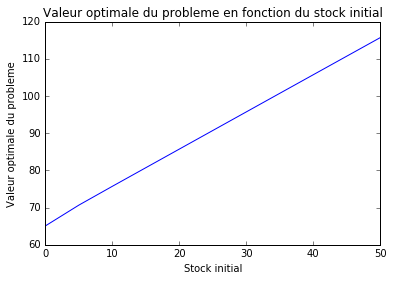

In [4]:
# Plot the value of the optimization problem in function of the initial stock s0

stocks_initiaux = range(0, 51, 5)
val_opt = []

for stock in stocks_initiaux:
    val_opt.append(V[0][stock])
    
plt.plot(stocks_initiaux , val_opt)
plt.xlabel('Stock initial')
plt.ylabel('Valeur optimale du probleme')
plt.title('Valeur optimale du probleme en fonction du stock initial')
plt.show()

In [5]:
print("Value of the optimization problem for s_0 = 15 : ", V[0,15])

('Value of the optimization problem for s_0 = 15 : ', 80.716189660788217)


In [6]:
# Affichage d'une trajectoire simulée
stock = np.zeros(T+1)
demande = np.zeros(T)
achat = np.zeros(T)

stock[0] = 15
for t in range(0,T):
    demande[t] = np.random.binomial(n[t],0.5,1)
    achat[t] = U[t][stock[t]]
    vente = min(demande[t], stock[t]+achat[t])
    stock[t+1]=stock[t]+achat[t]-vente
    
print("stock : ",stock)
print("demande : ", demande)
print("achat : ", achat)

('stock : ', array([ 15.,  17.,  16.,  18.,  22.,  29.,  12.,   2.]))
('demande : ', array([  4.,   6.,   7.,   6.,   3.,  23.,  18.]))
('achat : ', array([  6.,   5.,   9.,  10.,  10.,   6.,   8.]))


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
